In [1]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
os.chdir('/Users/matthewhartz/python_practice/projects/sixers_2021_playoffs')

#This cell will contain a description of metrics used throughout this analysis

Description of Methods Used:

usg_rtg- Usage Rating, is an estimate of the percentage of team plays used by a player while he was on the floor. In short, if a players Usage Rating is 30% this means they are finishing 30% of their teams possession(i.e. taking a a shot, turning the ball over, getting to the free throw line). Higher the usage rating, the larger part of the offense the player is.

ts_pct- True Shooting Percentage, the formula is PTS / (2 * (FGA+(.44*FTA)). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws. The league average here is about 56%, once you get into the 60s you're looking at elite efficiency from the field.

bpm

ws

ws_per_48

Ortg- Offensive Rating, this is used to show how many points a team scores per 100 possessions. This year the Nets lead the league in Ortg at 117. The league median comes in at 111.5.

Drtg- Defensive Rating, this is used to show how many points a team gives up per 100 possession. This year the Lakers and Sixers are tied for the league lead at 106.8. The league median comes in at 111.7.

Net_rating, This is calculated through subtracting Ortg by Drtg. A positive number means you are scoring more points per 100 possessions than you are giving up. This year the Jazz lead the league at 9. The league median comes in at .7.

stocks_per_g, this is stat that simply consolidates Steals and Blocks into a single metric.


In [4]:
#Load Data

#Load Historical MVP CSV
mvp_seasons = pd.read_excel('data/mvp_votings.xlsx')

#Load Team Record
teams = pd.read_csv('data/Team_Records.csv')

# Was Embiid's Season MVP worthy

In [5]:
#Load Historical CSV
mvp_seasons = pd.read_excel('data/mvp_votings.xlsx')

In [6]:
#Add or Remove any columns
mvp_seasons['mvp_winner'] = 0
for season in mvp_seasons['season'].value_counts().index:
    
    temp_df = mvp_seasons[mvp_seasons['season'].isin([season])]
    index=[temp_df['points_won'].idxmax()]
    mvp_seasons.at[index, 'mvp_winner'] = 1

mvp_seasons['embiid_tag'] = 0
mvp_seasons.at[637,'embiid_tag']= 1

mvp_seasons['stocks_per_g'] = mvp_seasons['stl_per_g']+mvp_seasons['blk_per_g']

mvp_seasons['embiid_and_mvps'] = mvp_seasons['embiid_tag'].apply(lambda row: 1 if row==1  else 0)
mvp_seasons['embiid_and_mvps'] = mvp_seasons['mvp_winner'].apply(lambda row: 1 if row==1  else 0)

mvp_seasons['team_wins'] = mvp_seasons['win_pct'].apply(lambda row: round(82 * row))


big_man_contemporaries = ['Moses Malone', 'Karl Malone','''Shaquille O'neal''', 'Patrick Ewing', 
                       'Tim Duncan', 'Kevin Garnett', 'Dirk Nowitzki', 'Hakeem Olajuwon', 'Charles Barkley',
                      'Dwight Howard', 'Nikola Jokic', 'Joel Embiid', 'Yao Ming', 'Tyson Chandler', 'Marc Gasol']

mvp_seasons['big_man'] = mvp_seasons['player'].apply(lambda row: 1 if row in big_man_contemporaries else 0)




#Dop rows with NAs

#mvp_seasons = mvp_seasons.dropna()

In [7]:
#Make list of noteworthy players to call out later


#Get index for those players
#mvp_seasons[mvp_seasons['season'].isin(['2020-21']) & mvp_seasons['player'].isin(['Joel Embiid'])].index[0]

In [8]:
#Make df with MVPs and Embiid

mvps_and_embiid=mvp_seasons[(mvp_seasons.mvp_winner==1)|(mvp_seasons.embiid_tag==1)]

big_men = mvp_seasons[(mvp_seasons.big_man==1)]

In [22]:

mvp_seasons.columns


Index(['Unnamed: 0', 'fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
       'season', 'player', 'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48', 'mvp_winner', 'embiid_tag', 'stocks_per_g',
       'embiid_and_mvps', 'team_wins', 'big_man'],
      dtype='object')

Embiid has had an unreal season, and has obviously been the driving factor behind this team's success. Unfortunately, due to the amount of games missed it is unlikely voters will make him the first Sixer player to win MVP since Allen Iverson in 2001. 

To help grasp just how crazy Embiid's season has been I took a look at each individual season that garnered an MVP vote since 1981. So this dataset includes all the MVP winners and runners-up. In the 80s and 90s, usually there was around 15-20 players to receive a vote. In recent years, it's usually about 10 players who receieve a vote.

The first chart I wanted to use to show Embiid's impact was a graph of Usage Rate and True Shooting %. 

*If you need a refresher on these metrics refer to the METHODS section at the beginning of this analysis*

I've included every player in this first chart to mask where Embiid ended up. The closer to the top right, the more efficient and part of the offense the player is.

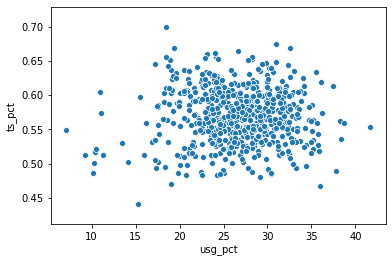

In [10]:
#graph of USG and TS
sns.scatterplot(mvp_seasons['usg_pct'],mvp_seasons['ts_pct'])
plt.show()

If we now color in all of the players who won an MVP and Embiid, we can see that many of those players end up in the top right quadrant. Now the question is which one do you think is Joel?

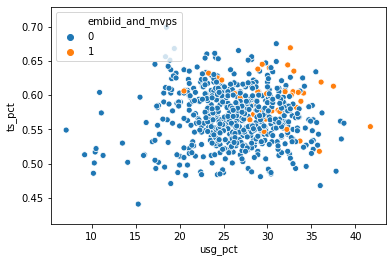

In [11]:
#color in Embiid and MVPS
g2 = sns.scatterplot(mvp_seasons['usg_pct'],mvp_seasons['ts_pct'],hue=mvp_seasons['embiid_and_mvps'])
g2.legend(loc='upper left')

Now let's get rid of all those non-MVPs and see what we're left with. Embiid is as high up there as anyone else. His efficieny this season, driver largely by his ability to get to the line, we elite. And he was as instrumental to the offense as any other MVP.

Now here comes the caveat. Did Embiid just have one of the best seasons of all time? Probably not. Modern teams and players have the benefit of a faster pace, knowing which shots are the most efficient on the floor, and running a spacious offensive system. That's not to say Embiid didn't dominate, but if players like Hakeem or Shaq had the benefit of this era's spacing and movement they probably would've end up a little higher on the chart.

[[<matplotlib.axis.YTick at 0x7f9fa8abccd0>,

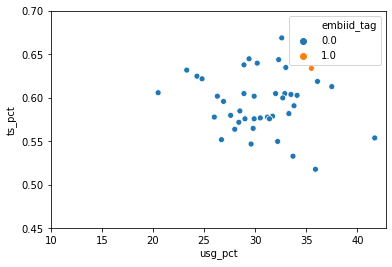

In [12]:
# do exact graph with just mvps

graph = sns.scatterplot(mvps_and_embiid['usg_pct'], mvp_seasons['ts_pct'], hue= mvps_and_embiid['embiid_tag'])
graph.set(xticks=[5*i for i in range(2,9)])
graph.set(yticks=[.05*i for i in range(9,15)])


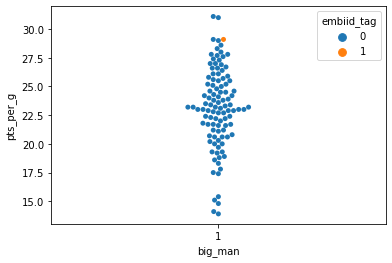

In [13]:
#swarmplot of embiid vs key big men in certain metrics

sns.swarmplot(x='big_man', y='pts_per_g', data=big_men, hue='embiid_tag')

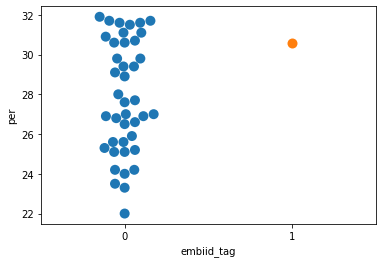

In [14]:
#box and whisker of PER 

sns.swarmplot(y = mvps_and_embiid['per'],x=mvps_and_embiid['embiid_tag'],s=10)

In [15]:
#Create Df for Model Work
#list_of_columns_to_drop = ['Unnamed: 0', 'season', 'player','win_pct', 'votes_first', 'points_won','points_max', 'award_share', 'embiid_tag' ]
#mvp_model = mvp_seasons.drop(list_of_columns_to_drop, axis=1, inplace=False)


features=['per', 'ts_pct', 'usg_pct', 'bpm', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'ws_per_48','team_wins']

training_seasons=['1980-81', '1981-82', '1984-85', '1982-83', '1998-99', '1996-97',
       '1990-91', '1997-98', '1988-89', '2001-02', '1985-86', '2000-01',
       '2007-08', '1991-92', '1993-94', '2006-07', '1986-87', '1995-96',
       '1987-88', '2013-14', '1999-00', '2012-13' , '2003-04',
       '1994-95', '2011-12', '2009-10', '1983-84', '1989-90', '1992-93','2018-19','2002-03']
testing_seasons=['2017-18', '2010-11' , '2014-15', '2008-09', '2005-06',
       '2016-17', '2015-16' , '2019-20','2020-21', '2004-05']

#training data
training_data=mvp_seasons[mvp_seasons['season'].isin(training_seasons)]
train_X=training_data[features]
train_y=training_data['award_share']

#testing data
testing_data=mvp_seasons[mvp_seasons['season'].isin(testing_seasons)]
test_X=testing_data[features]
test_y=testing_data['award_share']

In [16]:
#model

share_model = DecisionTreeRegressor(random_state=1)
share_model.fit(train_X, train_y)
predictions=share_model.predict(test_X)


#put testing data and predictions into new dataframe
predicted_df=pd.DataFrame()
test_Xdf=pd.DataFrame(test_X)
print('---------------------')
print(test_Xdf)
print('---------------------')
test_Xdf['Prediction']=predictions
test_Xdf['award_share']=test_y
test_Xdf['season']=[mvp_seasons['season'][index] for index in test_Xdf.reset_index()['index']]
test_Xdf['player']=[mvp_seasons['player'][index] for index in test_Xdf.reset_index()['index']]
test_Xdf['mvp_winner']=[mvp_seasons['mvp_winner'][index] for index in test_Xdf.reset_index()['index']]
test_Xdf['embiid_and_mvps']=[mvp_seasons['embiid_and_mvps'][index] for index in test_Xdf.reset_index()['index']]
predicted_df=predicted_df.append(test_Xdf)
   

---------------------
      per  ts_pct  usg_pct   bpm   g  mp_per_g  pts_per_g  trb_per_g  \
442  22.0   0.606     20.5   1.7  75      34.3       15.5        3.3   
443  27.0   0.583     30.5   5.6  73      34.1       22.9       10.4   
444  26.1   0.578     28.7   5.7  78      38.7       26.1        9.7   
445  27.0   0.540     28.9   6.4  66      33.4       20.3       11.1   
446  23.2   0.532     35.0   4.3  75      42.3       30.7        4.0   
..    ...     ...      ...   ...  ..       ...        ...        ...   
635  22.9   0.573     33.4   2.6  63      30.3       22.9       11.0   
636  23.1   0.577     30.1   4.9  75      34.0       23.1        5.2   
637  30.6   0.634     35.5   7.4  60      31.5       29.1       10.8   
638  31.1   0.645     29.4  11.7  80      35.0       26.4       10.9   
640  31.9   0.613     37.5  11.5  63      30.4       29.5       13.6   

     ast_per_g  stl_per_g  blk_per_g  ws_per_48  team_wins  
442       11.5        1.0        0.1      0.203     

In [17]:
predicted_df[(predicted_df['season']=="2020-21")]

,per,ts_pct,usg_pct,bpm,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,ws_per_48,team_wins,Prediction,award_share,season,player,mvp_winner,embiid_and_mvps
637,30.6,0.634,35.5,7.4,60,31.5,29.1,10.8,2.9,1.0,1.4,0.271,56,0.031,0.64,2020-21,Joel Embiid,0,0
638,31.1,0.645,29.4,11.7,80,35.0,26.4,10.9,8.4,1.4,0.7,0.301,53,0.496,0.91,2020-21,Nikola Jokic,1,1


# How Does This Sixers Team Compare to Team's of Past

In [18]:
teams['net_rating'] = teams['Ortg']-teams['DRtg']

#Remove the asterisk to keep team names consistent
teams['Team'] = teams['Team'].str.replace('*', '')

#Add a 'date' so we can make a time series graph easily
teams['Date'] = teams['Season'].str[:4].astype(int)+1

#Fill in NaN playoff messages
teams['Playoffs'].fillna('Did not make Playoffs', inplace=True)

#Dummy column for champs
teams['champs'] = teams['Playoffs'].apply(lambda row: 1 if row=='Won Finals' else 0)  


teams['champs_and_sixers'] = 0

teams['champs_and_sixers'] = teams['Playoffs'].apply(lambda row: 1 if row=='Won Finals' else 0)

teams.at[6,'champs_and_sixers']= 1

teams.head(10)

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel Pace,...,Rel Ortg,DRtg,Rel DRtg,Playoffs,Coaches,Top WS,net_rating,Date,champs,champs_and_sixers
0,2017-18,NBA,Golden State Warriors,58,24,0.707,1,5.79,99.6,2.3,...,5.0,107.6,-1.0,Won Finals,NaN,NaN,6.0,2018,1,1
1,2018-19,NBA,Toronto Raptors,58,24,0.707,1,5.49,100.2,0.2,...,2.7,107.1,-3.3,Won Finals,NaN,NaN,6.0,2019,1,1
2,2019-20,NBA,Los Angeles Lakers,60,22,0.732,1,6.28,100.9,0.6,...,1.4,106.3,-4.3,Won Finals,NaN,NaN,5.7,2020,1,1
3,2019-20,NBA,Philadelphia 76ers,48,34,0.589,3,2.25,99.0,-1.3,...,0.7,109.0,-1.6,Lost E. Conf. 1st Rnd.,NaN,NaN,2.3,2020,0,0
4,2018-19,NBA,Philadelphia 76ers,51,31,0.622,2,2.25,101.6,1.6,...,2.2,110.0,-0.4,Lost E. Conf. Semis,NaN,NaN,2.6,2019,0,0
5,2017-18,NBA,Philadelphia 76ers,52,30,0.634,3,4.30,99.8,2.5,...,0.9,105.0,-3.6,Lost E. Conf. Semis,NaN,NaN,4.5,2018,0,0
6,2020-21,NBA,Philadelphia 76ers,56,26,0.687,1,5.56,99.8,0.6,...,0.7,107.5,-4.8,Did not make Playoffs,NaN,NaN,5.5,2021,0,1
7,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,...,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5),2.8,2017,0,0
8,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,...,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7),3.2,2016,0,0
9,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,...,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5),0.2,2015,0,0


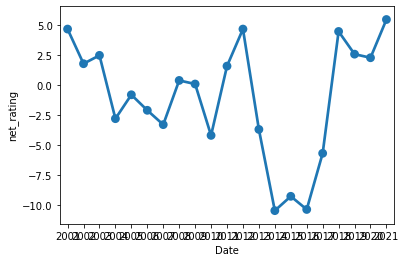

In [19]:
sixers_df = teams[(teams.Team=="Philadelphia 76ers")&(teams.Date>2000)]

sixers_df

sns.pointplot(x='Date', y='net_rating', data=sixers_df)

AttributeError: 'AxesSubplot' object has no attribute 'set_style'

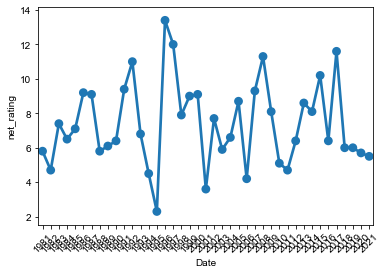

In [20]:
champs_and_sixers = teams[(teams.champs_and_sixers==1)&(teams.Date>1980)]

g3=sns.pointplot(x='Date', y='net_rating', data=champs_and_sixers)
sns.set(rc={'figure.figsize':(10,15)})
plt.xticks(rotation=45)
g3.set_style('whitegrid')

# Does this Sixers Team has what it takes to win the Championship




# What to Expect out of Embiid

#he gets to the line at an elite rate


# How crazy are Matisse's numbers

##Sentiment Analysis